<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#获取沪深300指数每日数据" data-toc-modified-id="获取沪深300指数每日数据-0.0.1"><span class="toc-item-num">0.0.1&nbsp;&nbsp;</span>获取沪深300指数每日数据</a></span></li><li><span><a href="#获取沪深300指数技术指标" data-toc-modified-id="获取沪深300指数技术指标-0.0.2"><span class="toc-item-num">0.0.2&nbsp;&nbsp;</span>获取沪深300指数技术指标</a></span></li><li><span><a href="#包括有SMA，EWMA，BBANDS，CCI，EVM，ForceIndex，ROC" data-toc-modified-id="包括有SMA，EWMA，BBANDS，CCI，EVM，ForceIndex，ROC-0.0.3"><span class="toc-item-num">0.0.3&nbsp;&nbsp;</span>包括有SMA，EWMA，BBANDS，CCI，EVM，ForceIndex，ROC</a></span></li><li><span><a href="#检查数据的统计信息" data-toc-modified-id="检查数据的统计信息-0.0.4"><span class="toc-item-num">0.0.4&nbsp;&nbsp;</span>检查数据的统计信息</a></span></li><li><span><a href="#计算特征的重要性" data-toc-modified-id="计算特征的重要性-0.0.5"><span class="toc-item-num">0.0.5&nbsp;&nbsp;</span>计算特征的重要性</a></span></li><li><span><a href="#检查类别是否平衡" data-toc-modified-id="检查类别是否平衡-0.0.6"><span class="toc-item-num">0.0.6&nbsp;&nbsp;</span>检查类别是否平衡</a></span></li><li><span><a href="#特征标准化" data-toc-modified-id="特征标准化-0.0.7"><span class="toc-item-num">0.0.7&nbsp;&nbsp;</span>特征标准化</a></span></li><li><span><a href="#15个特征的重要性绘图结果" data-toc-modified-id="15个特征的重要性绘图结果-0.0.8"><span class="toc-item-num">0.0.8&nbsp;&nbsp;</span>15个特征的重要性绘图结果</a></span></li><li><span><a href="#对沪深300指数预测分类" data-toc-modified-id="对沪深300指数预测分类-0.0.9"><span class="toc-item-num">0.0.9&nbsp;&nbsp;</span>对沪深300指数预测分类</a></span></li><li><span><a href="#网格搜索+交叉验证" data-toc-modified-id="网格搜索+交叉验证-0.0.10"><span class="toc-item-num">0.0.10&nbsp;&nbsp;</span>网格搜索+交叉验证</a></span></li><li><span><a href="#回归" data-toc-modified-id="回归-0.0.11"><span class="toc-item-num">0.0.11&nbsp;&nbsp;</span>回归</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import sys
sys.path.append('.')
%matplotlib inline

/afs/ihep.ac.cn/users/s/suym/suym_local/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### 获取沪深300指数每日数据

In [22]:
import tushare as ts
import datetime as dt
daily_data = ts.get_hist_data('hs300',
                              str(dt.datetime(2016, 1, 30)), 
                              str(dt.datetime(2017, 12, 31))
                             )

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


In [23]:
daily_data.head(10)

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2017-12-29,4022.88,4043.14,4030.85,4012.87,904866.81,11.95,0.30,4027.224,4030.968,4025.080,994457.79,913525.53,943964.99
2017-12-28,3993.00,4036.70,4018.90,3980.24,1185428.88,27.69,0.69,4031.974,4025.969,4023.444,960431.79,912083.23,947415.10
2017-12-27,4045.28,4047.74,3991.21,3986.74,1051535.75,-62.41,-1.54,4041.764,4026.694,4022.804,917018.19,874309.21,942135.33
2017-12-26,4040.62,4056.86,4053.62,4015.30,911187.88,12.08,0.30,4049.620,4032.582,4025.931,887920.04,846701.76,951835.36
2017-12-25,4057.42,4086.93,4041.54,4026.45,919269.62,-13.06,-0.32,4045.962,4028.822,4026.041,860740.44,839921.69,957305.02
2017-12-22,4064.91,4076.80,4054.60,4048.49,734736.81,-13.25,-0.33,4034.712,4031.618,4026.462,832593.26,845143.68,983069.17
2017-12-21,4023.08,4080.78,4067.85,4014.65,968360.88,37.36,0.93,4019.964,4026.496,4028.941,863734.68,860952.86,1011761.34
2017-12-20,4036.02,4044.85,4030.49,4015.63,906045.00,-4.84,-0.12,4011.624,4016.817,4030.669,831600.23,854370.81,1052416.91
2017-12-19,3985.82,4035.63,4035.33,3985.82,775289.88,50.04,1.26,4015.544,4015.350,4040.523,805483.49,873052.51,1100353.16


### 获取沪深300指数技术指标
### 包括有SMA，EWMA，BBANDS，CCI，EVM，ForceIndex，ROC

In [5]:
from tools import create_lagged_series
tech_data = create_lagged_series("hs300",
                                 dt.datetime(2016, 1, 30),
                                 dt.datetime(2017, 12, 31)
                                )

In [6]:
tech_data.head(10)

,price_change,cla_Direction,reg_Direction,open,high,close,low,volume,SMA5,SMA10,SMA20,EWMA_20,Upper BollingerBand,Lower BollingerBand,CCI,EVM,ForceIndex,Rate of Change
date,,,,,,,,,,,,,,,,,,
2016-02-01,60.28,1.0,2961.33,2939.04,2944.52,2901.05,2869.56,867953.44,2914.352,3029.297,3150.1285,3152.254356,3515.514676,2784.742324,-93.879732,-577445.531822,-4.930149e+08,-0.163738
2016-02-02,-12.69,-1.0,2948.64,2901.53,2972.43,2961.33,2901.51,886019.62,2918.516,3003.117,3124.2560,3134.071084,3464.040409,2784.471591,-73.022335,-500331.503379,-4.584709e+08,-0.148745
2016-02-03,36.12,1.0,2984.76,2931.29,2954.71,2948.64,2909.90,773890.00,2922.174,2980.543,3094.6975,3116.410980,3380.901555,2808.493445,-74.189856,-516727.962747,-4.575006e+08,-0.167006
2016-02-04,-20.97,-1.0,2963.79,2960.33,2999.21,2984.76,2960.21,917797.25,2948.374,2970.884,3079.2165,3103.872792,3353.175983,2805.257017,-49.322388,-232411.070961,-2.841684e+08,-0.093984
2016-02-05,-17.08,-1.0,2946.71,2982.06,2988.36,2963.79,2962.85,768508.06,2951.914,2955.917,3059.3280,3090.531574,3303.070711,2815.585289,-49.683320,-206554.094397,-3.056895e+08,-0.118329
2016-02-15,90.33,1.0,3037.04,2888.43,2961.49,2946.71,2886.02,729194.31,2961.046,2937.699,3047.0410,3076.834281,3287.278540,2806.803460,-65.505730,-207215.883662,-1.791922e+08,-0.076975
2016-02-16,26.28,1.0,3063.32,2962.19,3042.09,3037.04,2962.19,1125796.38,2976.188,2947.352,3038.1075,3073.044349,3264.844769,2811.370231,-14.077152,-163807.771933,-2.011460e+08,-0.055562
2016-02-17,-9.62,-1.0,3053.70,3034.09,3065.78,3063.32,3027.05,1282916.12,2999.124,2960.649,3033.4795,3072.118221,3253.782372,2813.176628,13.641122,-156364.023199,-1.187467e+08,-0.029329
2016-02-18,-2.11,-1.0,3051.59,3079.53,3093.51,3053.70,3049.84,1244014.62,3012.912,2980.643,3025.0860,3070.364105,3227.261148,2822.910852,26.927969,-119038.293549,-2.088327e+08,-0.052108


### 检查数据的统计信息

In [7]:
tech_data.describe()

,price_change,cla_Direction,reg_Direction,open,high,close,low,volume,SMA5,SMA10,SMA20,EWMA_20,Upper BollingerBand,Lower BollingerBand,CCI,EVM,ForceIndex,Rate of Change
count,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,4.670000e+02,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,4.670000e+02,467.000000
mean,2.419272,0.087794,3463.479036,3456.040064,3476.590921,3461.059764,3438.972141,1.067397e+06,3456.326934,3450.995193,3441.733385,3443.692699,3536.440537,3347.026234,30.579297,-8702.341968,5.469402e+07,0.010821
std,28.948719,0.997207,298.453282,298.352512,297.887297,298.423381,298.935984,3.318126e+05,297.170048,294.538456,287.979380,283.321264,281.730155,300.670576,81.107044,54886.970276,1.312952e+08,0.034523
min,-190.800000,-1.000000,2877.470000,2881.340000,2939.870000,2877.470000,2821.210000,4.472750e+05,2914.352000,2937.699000,2981.742500,3025.453170,3137.177524,2784.471591,-163.481399,-577445.531822,-4.930149e+08,-0.167006
25%,-12.230000,-1.000000,3242.045000,3239.870000,3261.400000,3239.740000,3223.930000,8.275358e+05,3238.400000,3234.315500,3224.622750,3212.770015,3309.670883,3133.240668,-28.939978,-16747.131813,-2.862780e+07,-0.007469
50%,2.640000,1.000000,3405.040000,3395.230000,3418.690000,3404.390000,3383.890000,1.011883e+06,3399.006000,3393.239000,3403.277000,3402.188032,3484.733161,3305.260999,43.690694,1509.291956,5.321552e+07,0.016441
75%,15.915000,1.000000,3668.460000,3658.610000,3683.505000,3667.635000,3644.910000,1.241196e+06,3663.198000,3656.832000,3622.080000,3622.651305,3720.787650,3515.443252,95.115147,14991.976455,1.298534e+08,0.034555
max,120.640000,1.000000,4227.570000,4228.370000,4260.640000,4227.570000,4191.150000,2.369184e+06,4162.992000,4133.036000,4089.868500,4085.148148,4218.567825,3968.884781,227.633849,63586.114144,4.856589e+08,0.101568


### 计算特征的重要性

In [8]:
x_ori = tech_data.drop(['price_change', 'cla_Direction','reg_Direction'], axis = 1)
x_ori.describe()

,open,high,close,low,volume,SMA5,SMA10,SMA20,EWMA_20,Upper BollingerBand,Lower BollingerBand,CCI,EVM,ForceIndex,Rate of Change
count,467.000000,467.000000,467.000000,467.000000,4.670000e+02,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,4.670000e+02,467.000000
mean,3456.040064,3476.590921,3461.059764,3438.972141,1.067397e+06,3456.326934,3450.995193,3441.733385,3443.692699,3536.440537,3347.026234,30.579297,-8702.341968,5.469402e+07,0.010821
std,298.352512,297.887297,298.423381,298.935984,3.318126e+05,297.170048,294.538456,287.979380,283.321264,281.730155,300.670576,81.107044,54886.970276,1.312952e+08,0.034523
min,2881.340000,2939.870000,2877.470000,2821.210000,4.472750e+05,2914.352000,2937.699000,2981.742500,3025.453170,3137.177524,2784.471591,-163.481399,-577445.531822,-4.930149e+08,-0.167006
25%,3239.870000,3261.400000,3239.740000,3223.930000,8.275358e+05,3238.400000,3234.315500,3224.622750,3212.770015,3309.670883,3133.240668,-28.939978,-16747.131813,-2.862780e+07,-0.007469
50%,3395.230000,3418.690000,3404.390000,3383.890000,1.011883e+06,3399.006000,3393.239000,3403.277000,3402.188032,3484.733161,3305.260999,43.690694,1509.291956,5.321552e+07,0.016441
75%,3658.610000,3683.505000,3667.635000,3644.910000,1.241196e+06,3663.198000,3656.832000,3622.080000,3622.651305,3720.787650,3515.443252,95.115147,14991.976455,1.298534e+08,0.034555
max,4228.370000,4260.640000,4227.570000,4191.150000,2.369184e+06,4162.992000,4133.036000,4089.868500,4085.148148,4218.567825,3968.884781,227.633849,63586.114144,4.856589e+08,0.101568


### 检查类别是否平衡

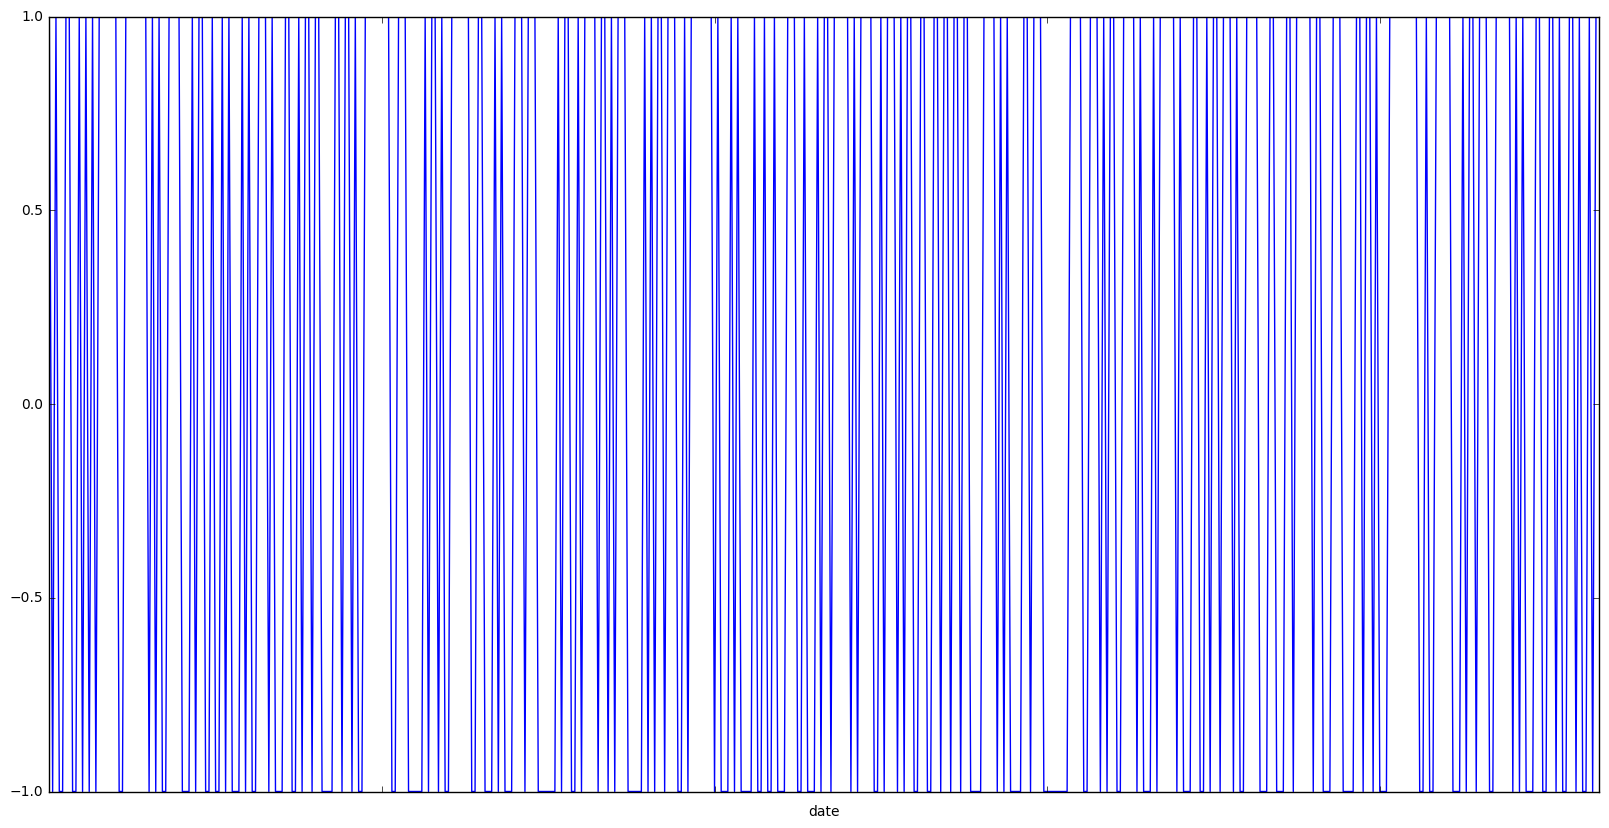

In [9]:
y = tech_data['cla_Direction']
y.plot(figsize = (20,10))

### 特征标准化

In [10]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
scaler = StandardScaler().fit(x_ori)
X = scaler.transform(x_ori)
X = pd.DataFrame(X, index = x_ori.index, columns = x_ori.columns)
X[0:10]

,open,high,close,low,volume,SMA5,SMA10,SMA20,EWMA_20,Upper BollingerBand,Lower BollingerBand,CCI,EVM,ForceIndex,Rate of Change
date,,,,,,,,,,,,,,,
2016-02-01,-1.734708,-1.788064,-1.878574,-1.906839,-0.601716,-1.825743,-1.433261,-1.013675,-1.029753,-0.074356,-1.872105,-1.536149,-10.373192,-4.176056,-5.061770
2016-02-02,-1.860567,-1.694270,-1.676362,-1.799845,-0.547211,-1.811716,-1.522241,-1.103613,-1.094001,-0.257260,-1.873006,-1.278714,-8.966725,-3.912672,-4.626990
2016-02-03,-1.760712,-1.753820,-1.718931,-1.771749,-0.885504,-1.799393,-1.598965,-1.206364,-1.156400,-0.552677,-1.793026,-1.293124,-9.265777,-3.905274,-5.156525
2016-02-04,-1.663273,-1.604274,-1.597765,-1.603272,-0.451338,-1.711134,-1.631794,-1.260179,-1.200702,-0.651194,-1.803802,-0.986195,-4.080178,-2.583687,-3.039080
2016-02-05,-1.590362,-1.640736,-1.668110,-1.594431,-0.901741,-1.699208,-1.682663,-1.329316,-1.247841,-0.829234,-1.769414,-0.990650,-3.608578,-2.747776,-3.745013
2016-02-15,-1.904521,-1.731035,-1.725406,-1.851718,-1.020350,-1.668446,-1.744583,-1.372028,-1.296238,-0.885348,-1.798653,-1.185940,-3.620648,-1.783287,-2.545865
2016-02-16,-1.657032,-1.460173,-1.422390,-1.596641,0.176191,-1.617437,-1.711774,-1.403082,-1.309629,-0.965062,-1.783448,-0.551177,-2.828937,-1.950676,-1.924921
2016-02-17,-1.415783,-1.380561,-1.334233,-1.379439,0.650219,-1.540173,-1.666580,-1.419170,-1.312902,-1.004370,-1.777434,-0.209061,-2.693172,-1.322415,-1.164254
2016-02-18,-1.263317,-1.287372,-1.366504,-1.303120,0.532854,-1.493725,-1.598625,-1.448347,-1.319100,-1.098608,-1.745024,-0.045067,-2.012395,-2.009283,-1.824779


### 15个特征的重要性绘图结果

Feature ranking: 
1.   feature   close   (0.075978)
2.   feature   volume   (0.073030)
3.   feature   low   (0.069013)
4.   feature   EVM   (0.068556)
5.   feature   high   (0.068068)
6.   feature   Rate of Change   (0.067339)
7.   feature   CCI   (0.067102)
8.   feature   SMA5   (0.066845)
9.   feature   open   (0.065409)
10.   feature   ForceIndex   (0.064830)
11.   feature   Lower BollingerBand   (0.064055)
12.   feature   Upper BollingerBand   (0.063227)
13.   feature   SMA20   (0.063160)
14.   feature   EWMA_20   (0.061924)
15.   feature   SMA10   (0.061465)


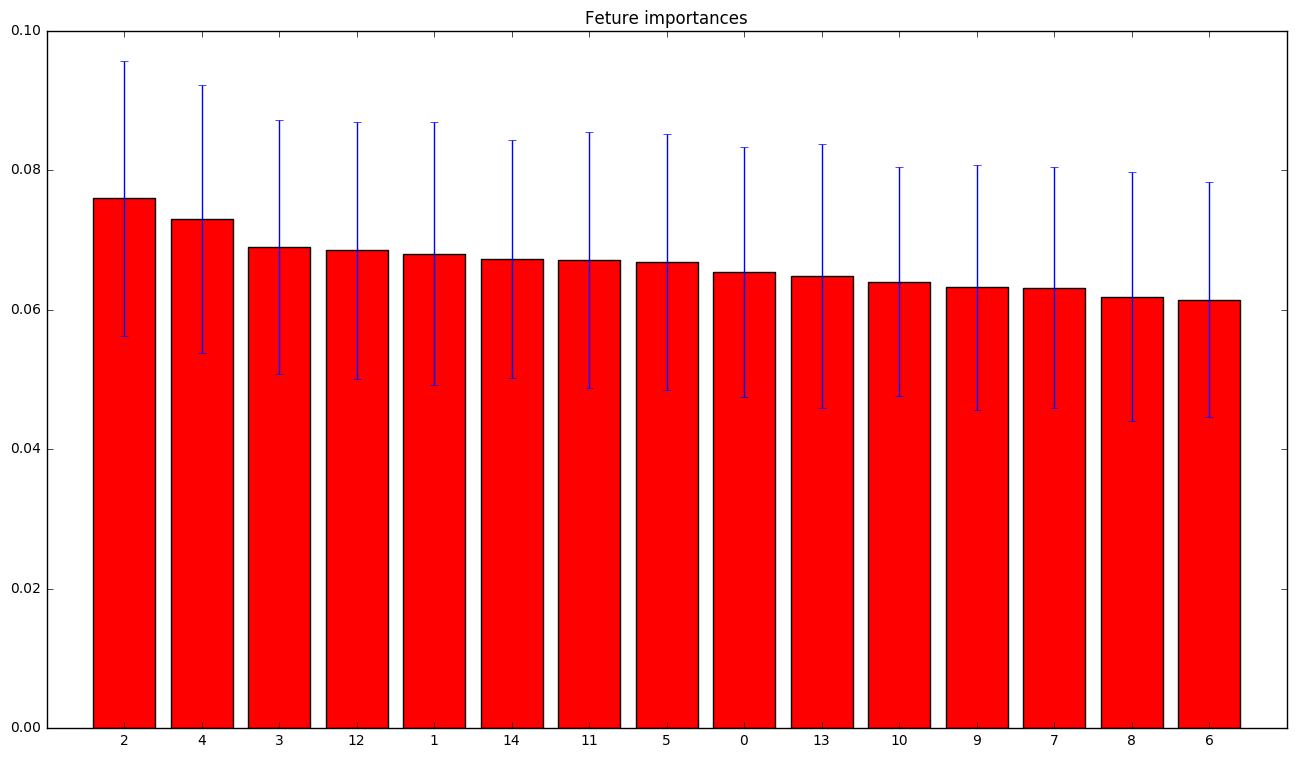

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators = 250,
                                                 random_state = 0)
forest.fit(X,y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_  for tree in forest.estimators_], axis = 0)
indices = np.argsort(importances)[::-1]
print("Feature ranking: ")

for f in range(len(indices)):
    print ("%d.   feature   %s   (%f)" % (f+1, x_ori.columns[indices[f]], importances[indices[f]]))
    
plt.figure(figsize = (16,9))
plt.title('Feture importances')
plt.bar(range(len(indices)), importances[indices],
            color="r", yerr = std[indices], align = 'center')
plt.xticks(range(len(indices)), indices)
plt.xlim([-1,len(indices)])
plt.show()

### 对沪深300指数预测分类

In [12]:
start_test = str(dt.datetime(2017,6,1))
X_train = X[X.index < start_test]
X_test = X[X.index >= start_test]
y_train = y[y.index < start_test]
y_test = y[y.index >= start_test]

print X_train.shape, y_train.shape, X_test.shape, y_test.shape

(322, 15) (322,) (145, 15) (145,)


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC, SVC

# Create the (parametrised) models
print("Hit Rates/Confusion Matrices:\n")
models = [("LR", LogisticRegression()),
              ("LDA", LDA()),
              ("QDA", QDA()),
              ("LSVC", LinearSVC()),
              ("RSVM", SVC(
                C=1000000.0, cache_size=200, class_weight=None,
                coef0=0.0, degree=3, gamma=0.0001, kernel='rbf',
                max_iter=-1, probability=False, random_state=None,
                shrinking=True, tol=0.001, verbose=False)
              ),
              ("RF", RandomForestClassifier(
                n_estimators=1000, criterion='gini',
                max_depth=None, min_samples_split=2,
                min_samples_leaf=1, max_features='auto',
                bootstrap=True, oob_score=False, n_jobs=10,
                random_state=None, verbose=0)
              )]
# Iterate through the models
for m in models:

    # Train each of the models on the training set
    m[1].fit(X_train, y_train)

    # Make an array of predictions on the test set
    pred = m[1].predict(X_test)

    # Output the hit-rate and the confusion matrix for each model
    print("%s:\n%0.3f" % (m[0], m[1].score(X_test, y_test)))
    print("%s\n" % confusion_matrix(pred, y_test))



Hit Rates/Confusion Matrices:

LR:
0.428
[[62 83]
 [ 0  0]]



/afs/ihep.ac.cn/users/s/suym/suym_local/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/afs/ihep.ac.cn/users/s/suym/suym_local/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


LDA:
0.428
[[61 82]
 [ 1  1]]

QDA:
0.524
[[ 7 14]
 [55 69]]

LSVC:
0.428
[[62 83]
 [ 0  0]]

RSVM:
0.490
[[11 23]
 [51 60]]

RF:
0.428
[[62 83]
 [ 0  0]]



### 网格搜索+交叉验证

In [14]:
from sklearn.model_selection import GridSearchCV

# Set the parameters by cross-validation
tuned_parameters = [
        {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]}
            ]

# Perform the grid search on the tuned parameters
model = GridSearchCV(SVC(), tuned_parameters, cv=10, n_jobs=1)
model.fit(X_train, y_train)

print("Optimised parameters found on training set:")
print(model.best_estimator_, "\n")

print("Grid scores calculated on training set:")
for params, mean_score, scores in model.grid_scores_ :
    print("%0.3f for %r" % (mean_score, params))

Optimised parameters found on training set:
(SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), '\n')
Grid scores calculated on training set:
0.531 for {'kernel': 'rbf', 'C': 1, 'gamma': 0.001}
0.531 for {'kernel': 'rbf', 'C': 1, 'gamma': 0.0001}
0.522 for {'kernel': 'rbf', 'C': 10, 'gamma': 0.001}
0.531 for {'kernel': 'rbf', 'C': 10, 'gamma': 0.0001}
0.497 for {'kernel': 'rbf', 'C': 100, 'gamma': 0.001}
0.522 for {'kernel': 'rbf', 'C': 100, 'gamma': 0.0001}
0.519 for {'kernel': 'rbf', 'C': 1000, 'gamma': 0.001}
0.500 for {'kernel': 'rbf', 'C': 1000, 'gamma': 0.0001}


/afs/ihep.ac.cn/users/s/suym/suym_local/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [15]:
y_pred = model.predict(X_test)
print("%s \n %0.3f" % ('Scores:', model.score(X_test, y_test)))
print("%s \n" %confusion_matrix(y_pred,y_test))

Scores: 
 0.572
[[ 0  0]
 [62 83]] 



### 回归

In [16]:
y_reg = tech_data['reg_Direction']
X = X

y_reg[0:5]


date
2016-02-01    2961.33
2016-02-02    2948.64
2016-02-03    2984.76
2016-02-04    2963.79
2016-02-05    2946.71
Name: reg_Direction, dtype: float64

In [17]:
X.head(5)

,open,high,close,low,volume,SMA5,SMA10,SMA20,EWMA_20,Upper BollingerBand,Lower BollingerBand,CCI,EVM,ForceIndex,Rate of Change
date,,,,,,,,,,,,,,,
2016-02-01,-1.734708,-1.788064,-1.878574,-1.906839,-0.601716,-1.825743,-1.433261,-1.013675,-1.029753,-0.074356,-1.872105,-1.536149,-10.373192,-4.176056,-5.061770
2016-02-02,-1.860567,-1.694270,-1.676362,-1.799845,-0.547211,-1.811716,-1.522241,-1.103613,-1.094001,-0.257260,-1.873006,-1.278714,-8.966725,-3.912672,-4.626990
2016-02-03,-1.760712,-1.753820,-1.718931,-1.771749,-0.885504,-1.799393,-1.598965,-1.206364,-1.156400,-0.552677,-1.793026,-1.293124,-9.265777,-3.905274,-5.156525
2016-02-04,-1.663273,-1.604274,-1.597765,-1.603272,-0.451338,-1.711134,-1.631794,-1.260179,-1.200702,-0.651194,-1.803802,-0.986195,-4.080178,-2.583687,-3.039080
2016-02-05,-1.590362,-1.640736,-1.668110,-1.594431,-0.901741,-1.699208,-1.682663,-1.329316,-1.247841,-0.829234,-1.769414,-0.990650,-3.608578,-2.747776,-3.745013


In [18]:
start_test = str(dt.datetime(2017,6,1))
X_train = X[X.index < start_test]
X_test = X[X.index >= start_test]
y_train = y_reg[y_reg.index < start_test]
y_test = y_reg[y_reg.index >= start_test]

print X_train.shape, y_train.shape, X_test.shape, y_test.shape

(322, 15) (322,) (145, 15) (145,)


In [19]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

tuned_parameters = [
        {  'alpha': [1, 0.5, 0.1, 0.01, 0.001]}
            ]
model = GridSearchCV(Ridge(), tuned_parameters, cv=10, n_jobs=1)
model.fit(X_train, y_train)

print("Optimised parameters found on training set:")
print(model.best_estimator_, "\n")

print("Grid scores calculated on training set:")
for params, mean_score, scores in model.grid_scores_ :
    print("%0.3f for %r" % (mean_score, params))


Optimised parameters found on training set:
(Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001), '\n')
Grid scores calculated on training set:
0.653 for {'alpha': 1}
0.662 for {'alpha': 0.5}
0.670 for {'alpha': 0.1}
0.668 for {'alpha': 0.01}
0.668 for {'alpha': 0.001}


/afs/ihep.ac.cn/users/s/suym/suym_local/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [20]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
print "R2 Score:", r2_score(y_pred, y_test)

R2 Score: 0.962778429621


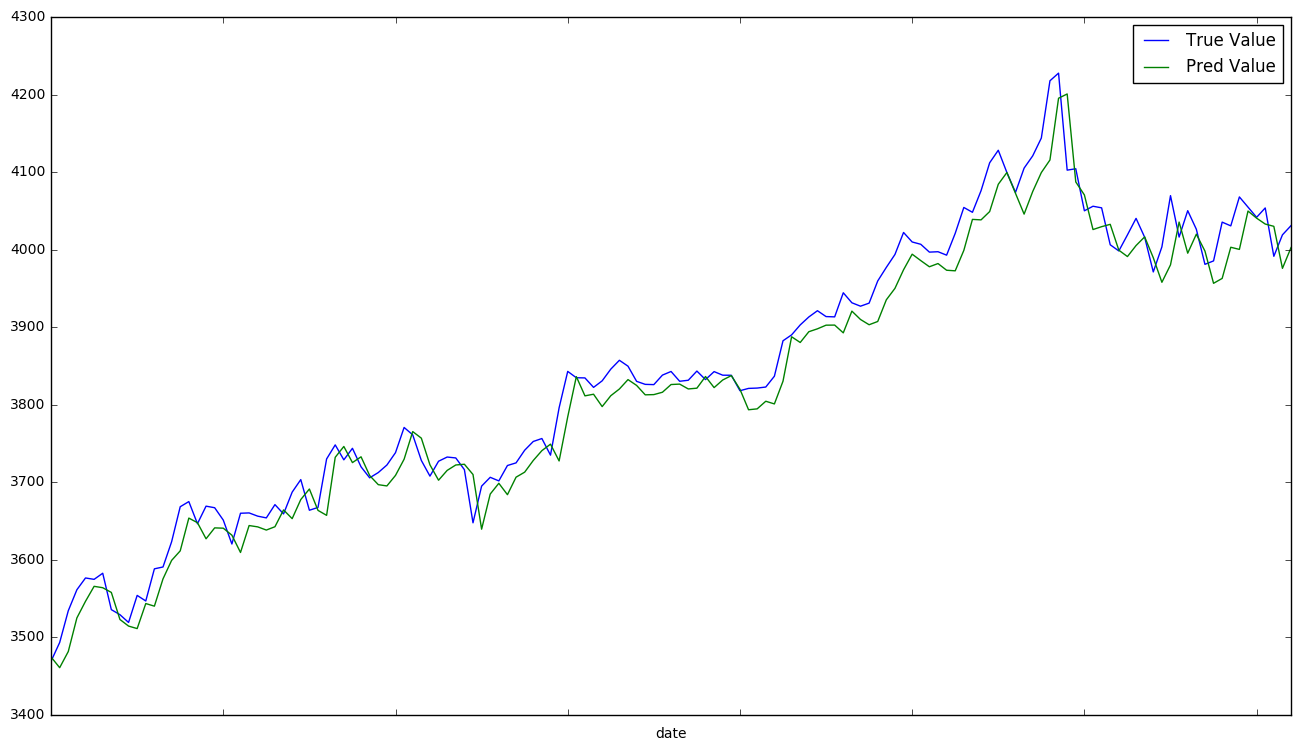

In [21]:
df_result = pd.DataFrame(index = y_test.index)
df_result['True Value'] = y_test
df_result['Pred Value'] = y_pred
df_result.plot(figsize = (16,9))